In [8]:
# base tool
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',100)
import numpy as np
from sklearn.model_selection import train_test_split
import copy

import warnings
warnings.filterwarnings('ignore')

#visualization
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import seaborn as sns    

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"


# test
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        st = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    st.columns = cols
    print('___________________________\nData Types:')
    print(st.Types.value_counts())
    print('___________________________')
    return st

In [3]:
raw_data = pd.read_csv('./Tetuan City power consumption.csv')
raw_data= pd.DataFrame(raw_data)

In [4]:
summary(raw_data)

Data shape: (52416, 9)
___________________________
Data Types:
float64    8
object     1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
DateTime,object,52416,52416,0,1/1/2017 0:00,9/9/2017 9:50
Humidity,float64,52416,4443,0,11.34,94.8
Temperature,float64,52416,3437,0,3.247,40.01
Wind Speed,float64,52416,548,0,0.05,6.483
Zone 1 Power Consumption,float64,52416,27709,0,13895.7,52204.4
Zone 2 Power Consumption,float64,52416,29621,0,8560.08,37408.9
Zone 3 Power Consumption,float64,52416,22838,0,5935.17,47598.3
diffuse flows,float64,52416,10449,0,0.011,936
general diffuse flows,float64,52416,10504,0,0.004,1163


In [5]:
heat_temp = raw_data.iloc[:,-3:]
r_column = list(heat_temp.columns)
heat_temp.rename(columns={r_column[0]:'Zone1',r_column[1]:'Zone2',r_column[2]:'Zone3'},inplace=True)

<AxesSubplot:>

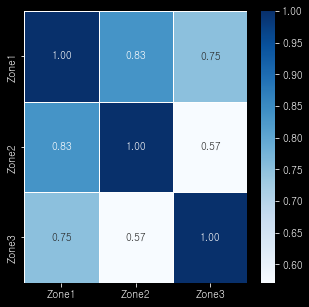

In [6]:
plt.figure(figsize=(5,5))
sns.heatmap(data = heat_temp.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [9]:
def vif(df:pd.DataFrame)->None:
    print('vif score')
    df = df.iloc[:,:-1]
    vif_scores = pd.DataFrame() 

    vif_scores["Attribute"] = df.columns 
    # calculating VIF for each feature 
    vif_scores["VIF Scores"] = [round(variance_inflation_factor(df.values, i) ,2)for i in range(len(df.columns))] 
    display(vif_scores)
    print('-'*50)

In [10]:
raw_data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [12]:
vif(raw_data.iloc[:,1:-2])

vif score


,Attribute,VIF Scores
0,Temperature,10.99
1,Humidity,6.49
2,Wind Speed,2.17
3,general diffuse flows,2.85
4,diffuse flows,2.02


--------------------------------------------------


In [7]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(raw_data.iloc[:,-2],raw_data.iloc[:,-1])
corr

(0.5709322667566566, 0.0)

In [20]:
corr = stats.pearsonr(raw_data.iloc[:,-3],raw_data.iloc[:,-2])
corr

(0.8345189396462863, 0.0)